In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
sns.set_palette("tab10")

import numpy as np
import scipy.stats as stats

from utils import *

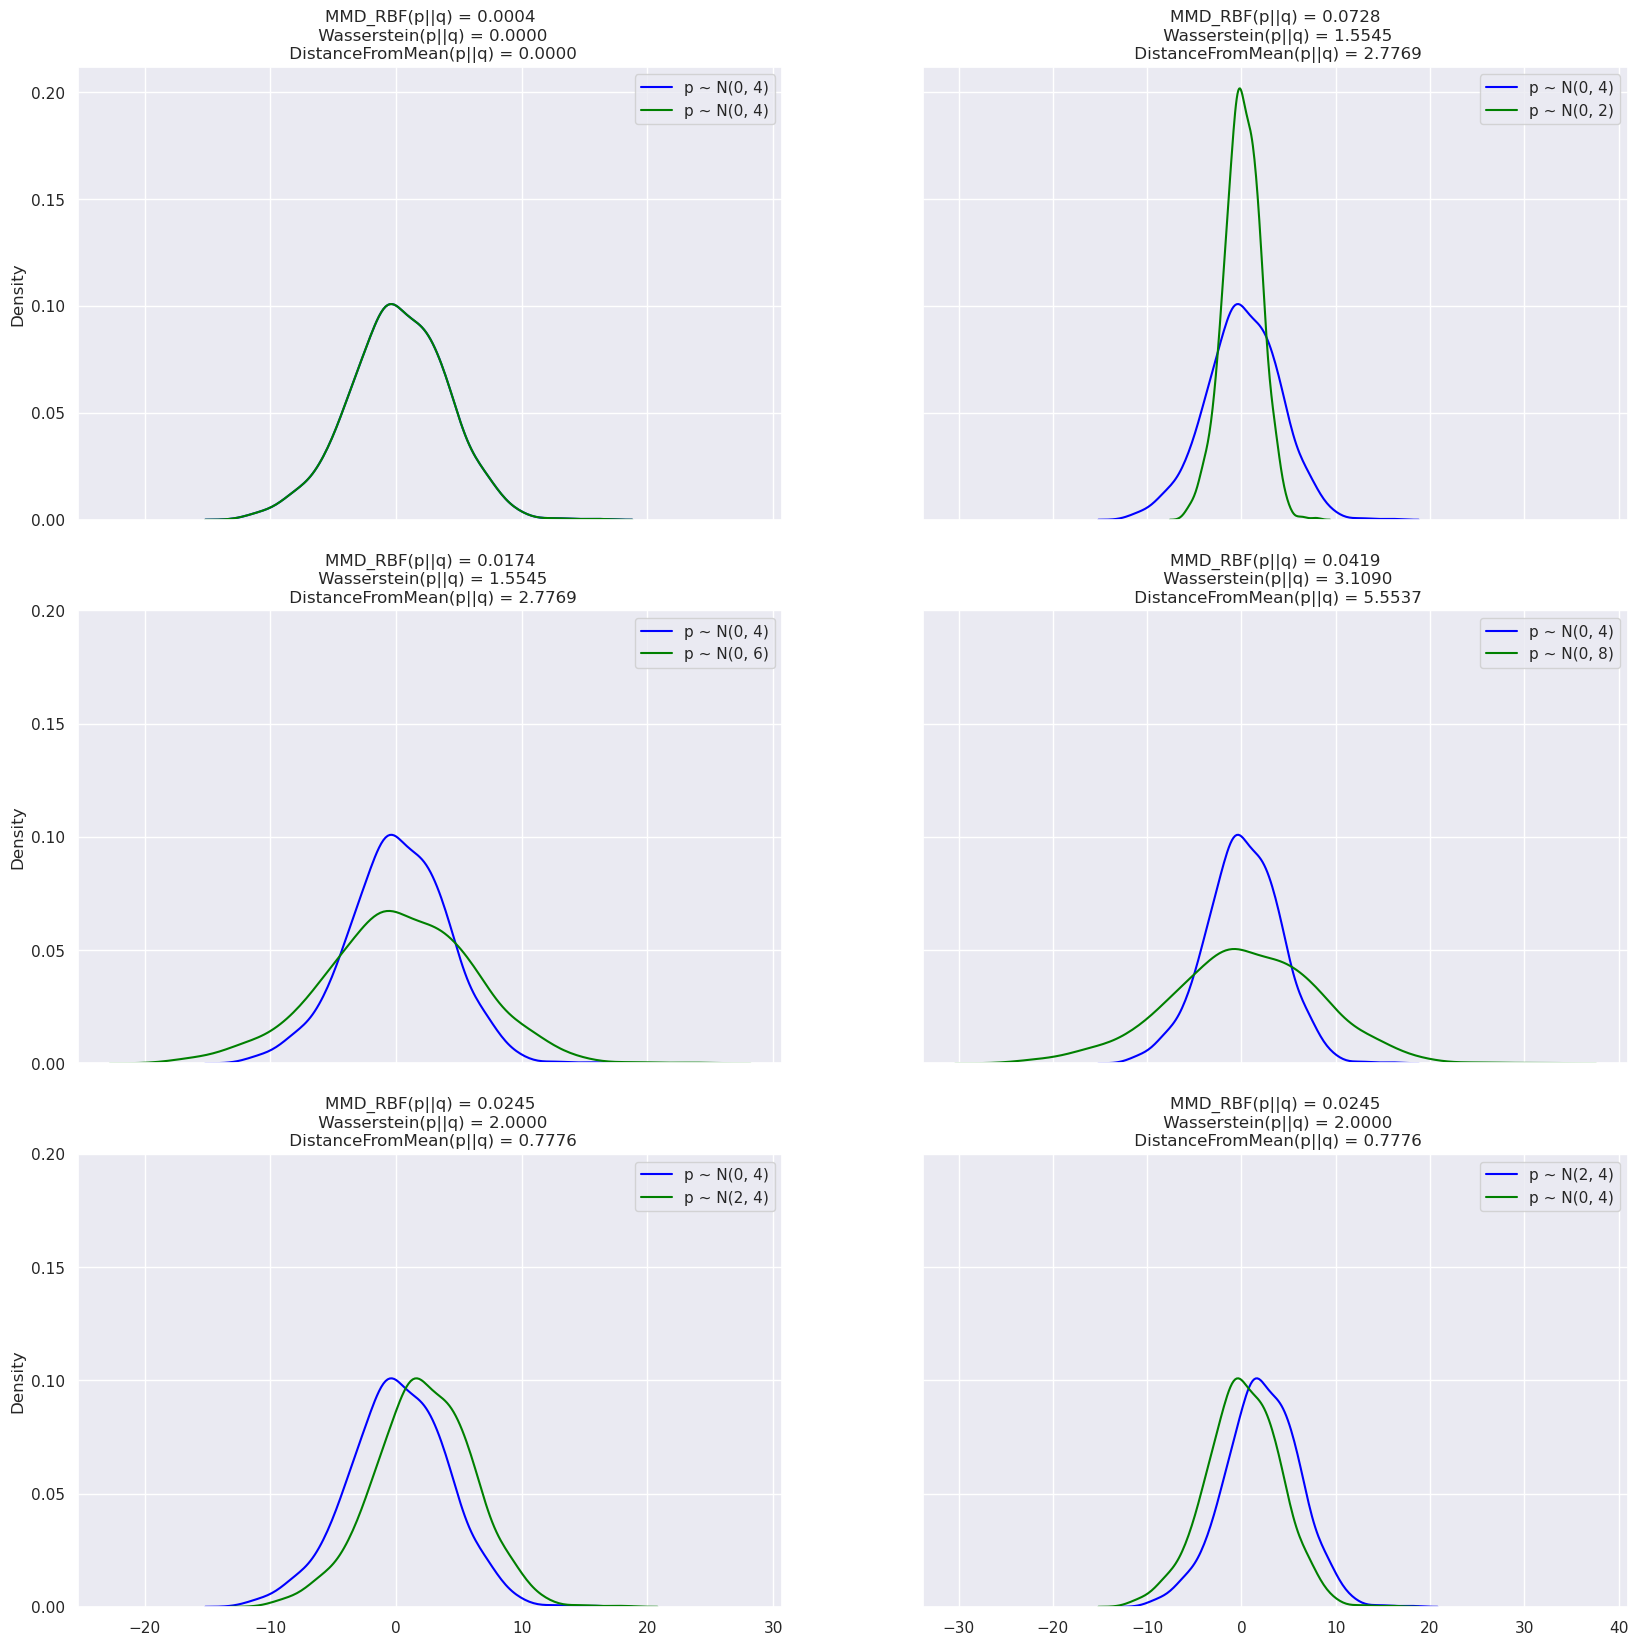

In [4]:
# set prob pairs
pairs = [[[0, 4], [0, 4]],
         [[0, 4], [0, 2]],
         [[0, 4], [0, 6]],
         [[0, 4], [0, 8]],
         [[0, 4], [2, 4]],
         [[2, 4], [0, 4]]]

# 
num_data = 1000

fig, axes = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,20))
axes = axes.flatten()
for i, (p, q) in enumerate(pairs):
    # p ~ N(mu, std) and q ~ N(mu, std)
    p_samples = stats.norm.rvs(
        loc=p[0], scale=p[1], size=(num_data,1), random_state=1)
    q_samples = stats.norm.rvs(
        loc=q[0], scale=q[1], size=(num_data,1), random_state=1)

    mmd_rbf = compute_mmd_rbf(p_samples, q_samples)
    wd = compute_wasserstein_distance(p_samples, q_samples)
    dfm = compute_diff_std(p_samples, q_samples, np.zeros(2))  

    sns.kdeplot(p_samples.squeeze(-1), color="blue",
                label=f"p ~ N({p[0]}, {p[1]})", fill=False, ax=axes[i])

    sns.kdeplot(q_samples.squeeze(-1), color="green",
                label=f"p ~ N({q[0]}, {q[1]})", fill=False, ax=axes[i])

    # sns.histplot(p_samples[:,0], color="blue", kde=True, stat="density",
    #             label=f"p ~ N({p[0]}, {p[1]})", ax=axes[i])

    # sns.histplot(q_samples[:,0], color="green", kde=True, stat="density",
    #             label=f"p ~ N({q[0]}, {q[1]})", ax=axes[i])

    tt = f"MMD_RBF(p||q) = {mmd_rbf:.4f}"
    tt += f"\n Wasserstein(p||q) = {wd:.4f}"
    tt += f"\n DistanceFromMean(p||q) = {dfm:.4f}"
    axes[i].set_title(tt)
    axes[i].set_yticks(np.arange(0, 0.21, 0.05))
    axes[i].legend()

plt.show()

[[0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]]
[[0.0, 0.0], [[4.0, 0.0], [0.0, 4.0]]]
[[0.0, 0.0], [[6.0, 0.0], [0.0, 6.0]]]
[[0.0, 0.0], [[4.0, 0.0], [0.0, 4.0]]]
[[0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]]
[[0.0, 0.0], [[4.0, 0.0], [0.0, 4.0]]]
[[0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]]
[[0.0, 0.0], [[2.0, -1.0], [-1.0, 2.0]]]
[[0.0, 0.0], [[4.0, -1.0], [-1.0, 4.0]]]


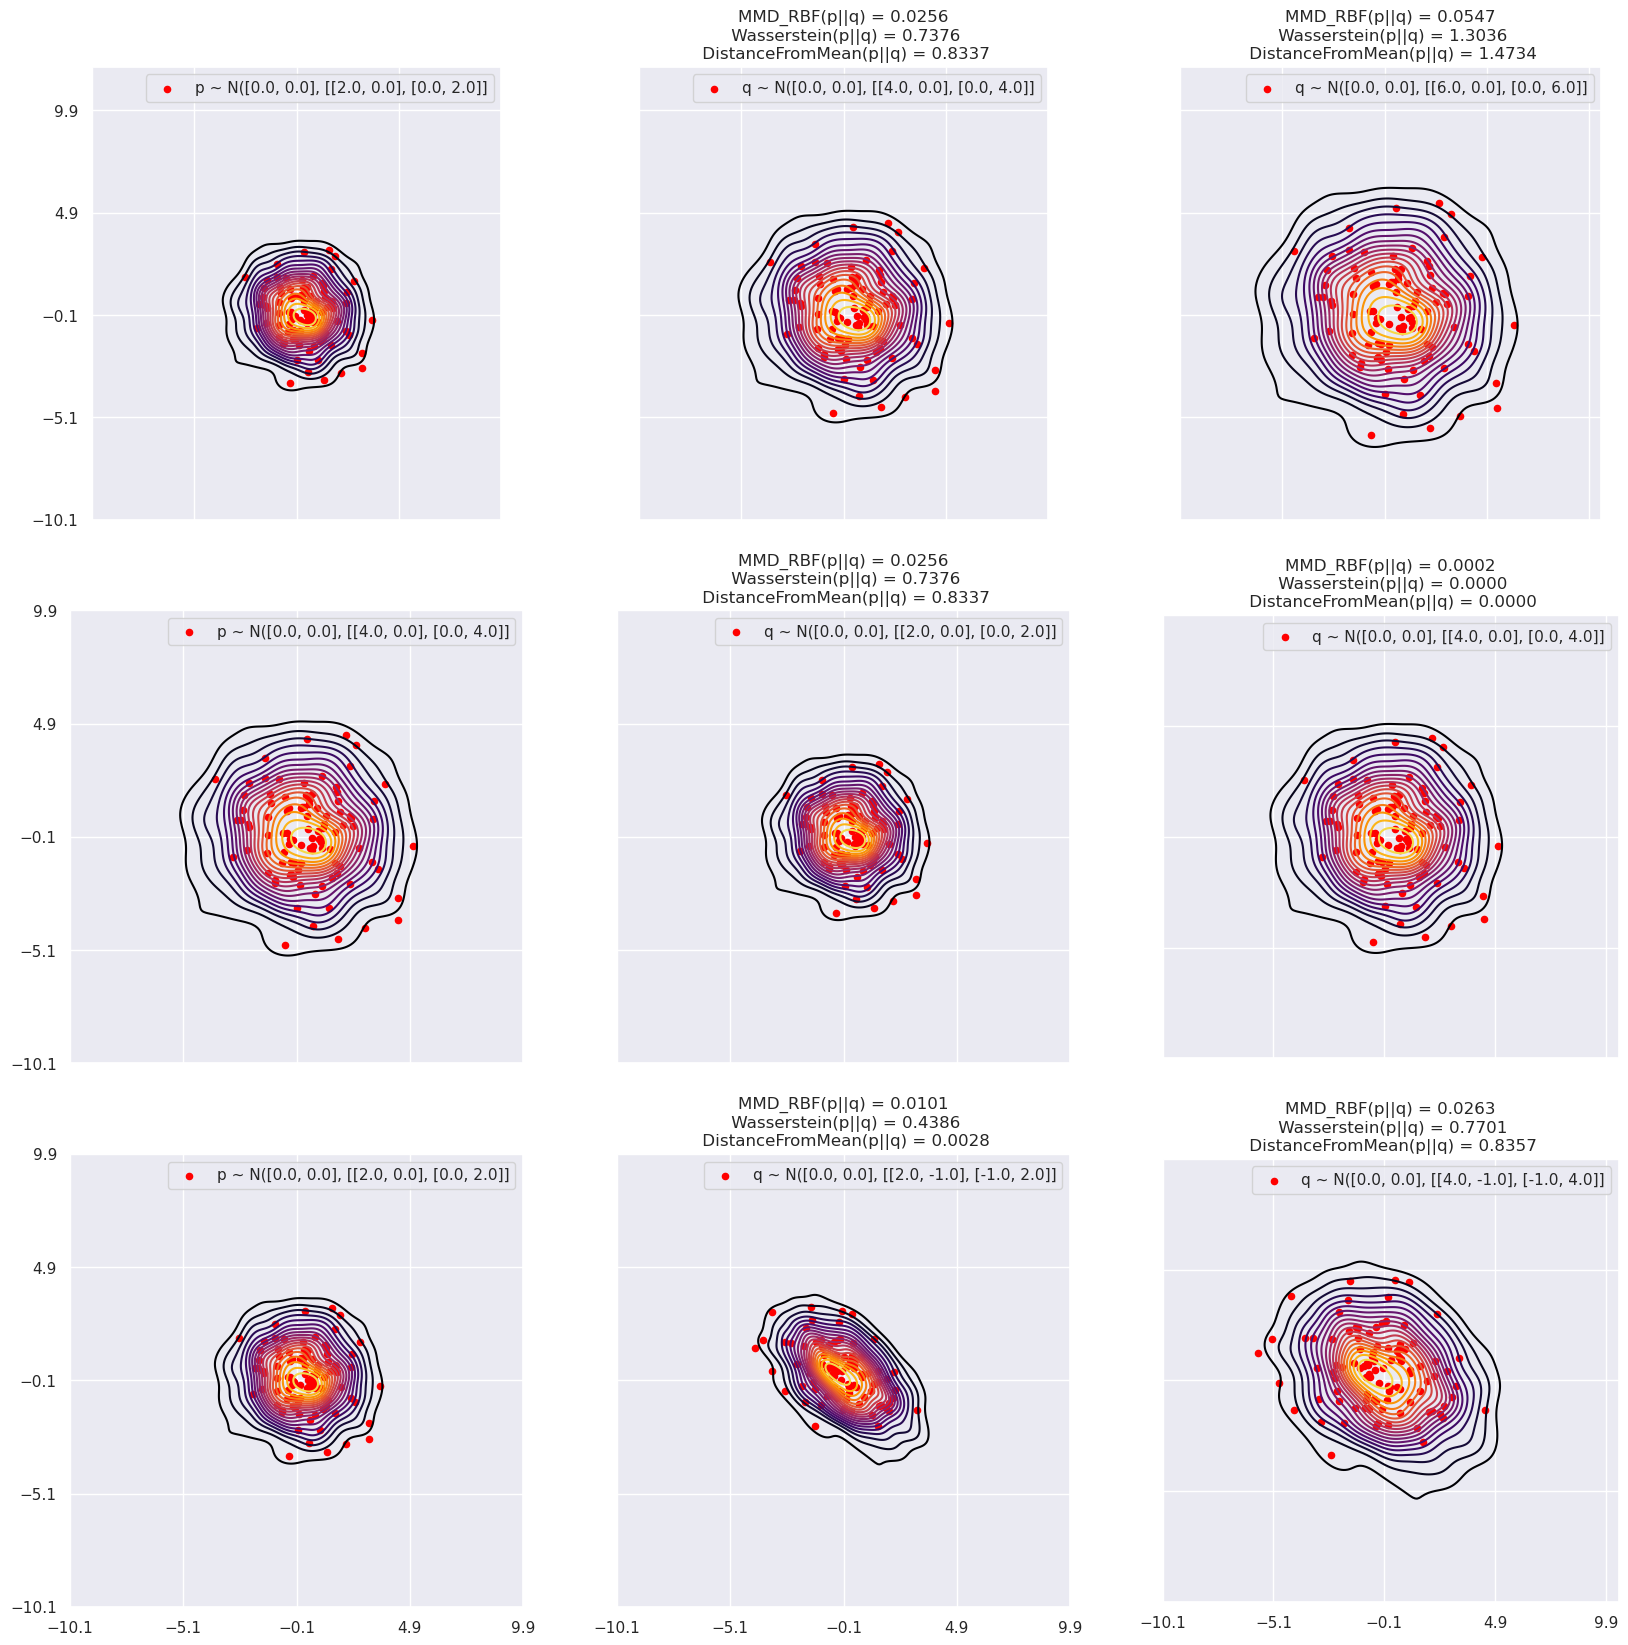

In [12]:
# set prob pairs
pairs = [
    [[[0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]],
     [[0.0, 0.0], [[4.0, 0.0], [0.0, 4.0]]],
     [[0.0, 0.0], [[6.0, 0.0], [0.0, 6.0]]]],

    [[[0.0, 0.0], [[4.0, 0.0], [0.0, 4.0]]],
     [[0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]],
     [[0.0, 0.0], [[4.0, 0.0], [0.0, 4.0]]],],
    
    [[[0.0, 0.0], [[2.0, 0.0], [0.0, 2.0]]],
     [[0.0, 0.0], [[2.0, -1.0], [-1.0, 2.0]]],
     [[0.0, 0.0], [[4.0, -1.0], [-1.0, 4.0]]]],
]

# 
num_data = 1000

nrows = 3
ncols = 3
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20,20))
axes = axes.flatten()
# for i, (p1_params, q1_params, q2_params) in enumerate(pairs):
for i in range(nrows):
    # p ~ N(mu, std) and q ~ N(mu, std)
    p_params = pairs[i][0]
    print(p_params)
    p_samples = stats.multivariate_normal.rvs(
        p_params[0], p_params[1], size=(num_data), random_state=1)

    sns.kdeplot(x=p_samples[:,0], y=p_samples[:,1], n_levels=20, 
                cmap="inferno", fill=False, ax=axes[ncols*i])

    axes[ncols*i].scatter(
        p_samples[:100,0], p_samples[:100,1], facecolor="red",
        label=f"p ~ N({p_params[0]}, {p_params[1]}", s=20, marker="o")

    axes[ncols*i].set_xticks(np.arange(-10.1, 10.1, 5))
    axes[ncols*i].set_yticks(np.arange(-10.1, 10.1, 5))
    axes[ncols*i].set_aspect(aspect="equal")
    axes[ncols*i].legend()

    for j in range(1, ncols):
        q_params = pairs[i][j]
        print(q_params)
        q_samples = stats.multivariate_normal.rvs(
            q_params[0], q_params[1], size=(num_data), random_state=1)

        mmd_rbf = compute_mmd_rbf(p_samples, q_samples)
        wd = compute_wasserstein_distance(p_samples, q_samples)
        dfm = compute_diff_std(p_samples, q_samples, np.zeros(2))  

        sns.kdeplot(x=q_samples[:,0], y=q_samples[:,1], n_levels=20, 
                    cmap="inferno", fill=False, ax=axes[ncols*i+j])

        axes[ncols*i+j].scatter(
            q_samples[:100,0], q_samples[:100,1], facecolor="red",
            label=f"q ~ N({q_params[0]}, {q_params[1]}", s=20, marker="o")
        axes[ncols*i+j].set_aspect(aspect="equal")

        tt = f"MMD_RBF(p||q) = {mmd_rbf:.4f}"
        tt += f"\n Wasserstein(p||q) = {wd:.4f}"
        tt += f"\n DistanceFromMean(p||q) = {dfm:.4f}"
        axes[3*i+j].set_title(tt)

        axes[ncols*i+j].set_xticks(np.arange(-10.1, 10.1, 5))
        axes[ncols*i+j].set_yticks(np.arange(-10.1, 10.1, 5))

        axes[ncols*i+j].legend()

plt.show()

